In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from astropy.io import fits
%matplotlib inline

/Users/lchevalier/Downloads/Ureka/variants/common/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [3]:
%cd /Users/lchevalier/Dropbox/Project1_N4526/sextractor

/Users/lchevalier/Dropbox/Project1_N4526/sextractor


In [4]:
#filename2='zeropoint_fix.fits'
#filename='28_07_background_match.fits'
filename='18_08_16_i.fits'
filename2='18_08_16_g.fits'
filename3='29_08_16_r.fits'
filename1='HST_2009.fits'
hdulist_i=fits.open(filename)
hdulist_g=fits.open(filename2)
hdulist_r=fits.open(filename3)
hdulist_hst=fits.open(filename1)
N4526_i=hdulist_i[1].data
N4526_g=hdulist_g[1].data
N4526_r=hdulist_r[1].data
HST=hdulist_hst[1].data
Apertures=np.arange(1,11,0.5)

#cols=hdulist[1].columns
Imag='MAG_APER_1_14'
Gmag='MAG_APER_1_15'
Rmag='MAG_APER_1_15'
SHST= HST['zmag'][HST['VCC']==1535 ]
SHST_G= HST['gmag'][HST['VCC']==1535 ]
Sel_HST=(HST['VCC']==1535)
#SSEX =(0.55<=(N4526[Gmag]-N4526[Imag]))&((N4526[Gmag]-N4526[Imag])<=1.7)&(N4526['CLASS_STAR_2']>=(((-N4526[Gmag]+25.6))**0.1)-0.6)&(N4526['CLASS_STAR_1']>=(((-N4526[Gmag]+25.6))**0.1)-0.6)&(N4526[Imag]<=25)&(N4526[Gmag]<=25.5)

IOError: [Errno 2] No such file or directory: '18_08_16_i.fits'

# Magnitude Completeness

In [ ]:
Bins= np.arange(20,26,1)
Bins_G= np.arange(21,27,1)

In [ ]:
HST_binned= np.digitize(SHST, Bins)
SSEX_binned= np.digitize(N4526_i['zmag'],Bins)

HST_G_binned= np.digitize(SHST_G, Bins_G)
SSEX_G_binned= np.digitize(N4526_g['gmag'],Bins_G)

SSEX_R_binned= np.digitize(N4526_r['gmag'],Bins_G)

In [5]:
HST_B = np.bincount(HST_binned)
SSEX_B = np.bincount(SSEX_binned)



if (len(HST_B)>len(SSEX_B)):
    SSEX_B=np.insert(SSEX_B,len(SSEX_B),0)
    if (len(HST_B)>len(SSEX_B)):
        SSEX_B=np.insert(SSEX_B,len(SSEX_B),0)
else:
    print 'has the right shape'

    
    
    
HST_G_B = np.bincount(HST_G_binned)
SSEX_G_B = np.bincount(SSEX_G_binned)

SSEX_R_B = np.bincount(SSEX_R_binned)




if (len(HST_G_B)>len(SSEX_G_B)):
    SSEX_G_B=np.insert(SSEX_G_B,len(SSEX_G_B),0)
    if (len(HST_G_B)>len(SSEX_G_B)):
        SSEX_G_B=np.insert(SSEX_G_B,len(SSEX_G_B),0)
else:
    print 'should be the right length \n\n'

if (len(HST_G_B)>len(SSEX_R_B)):
    SSEX_R_B=np.insert(SSEX_R_B,len(SSEX_R_B),0)
    if (len(HST_G_B)>len(SSEX_R_B)):
        SSEX_R_B=np.insert(SSEX_R_B,len(SSEX_R_B),0)
else:
    print 'should be the right length \n\n'



print 'HST objects:',HST_B
print 'I band SUBARU',SSEX_B
print ' \n'
print 'HST objects:',HST_G_B
print 'G band SUBARU',SSEX_G_B
print ' \n'
print 'HST objects:',HST_G_B
print 'R band SUBARU',SSEX_R_B

NameError: name 'HST_binned' is not defined

In [7]:
completeness_frac=np.true_divide(SSEX_B,HST_B)

if len(Bins)<len(completeness_frac):
    Bins=np.insert(Bins,0,min(SHST))
    
if len(Bins)>len(completeness_frac):
    completeness_frac=np.insert(completeness_frac,len(completeness_frac),0)
    
completeness_frac_G=np.true_divide(SSEX_G_B,HST_G_B)

if len(Bins_G)<len(completeness_frac_G):
    Bins_G=np.insert(Bins_G,0,min(SHST_G))
    
completeness_frac_R=np.true_divide(SSEX_R_B,HST_G_B)

if len(Bins_G)<len(completeness_frac_R):
    Bins_G=np.insert(Bins_G,0,min(SHST_R))

In [1]:
def Pritchet_f (mag, mag_0, a ):
    f=0.5 *(1-(a*(mag-mag_0))/(1+(a**2)*(mag-mag_0)**2)**0.5)
    
    return f
fake= np.arange(19,27,0.25)

plt.figure()

plt.scatter(Bins, completeness_frac)
plt.xlabel('Imag')
plt.ylabel('$f_{comp.}$')
plt.ylim(0.4,1.1)
plt.plot(fake,Pritchet_f(fake,26,0.5))
plt.savefig(filename[:-5]+'_Mag_completeness_I.png')


plt.figure()

plt.scatter(Bins_G, completeness_frac_G)
plt.xlabel('Gmag')
plt.ylabel('$f_{comp.}$')
plt.savefig(filename[:-5]+'_Mag_completeness_G.png')
#plt.figure()
#plt.hist(completeness_frac)

plt.figure()

plt.scatter(Bins_G, completeness_frac_R)
plt.xlabel('Rmag')
plt.ylabel('$f_{comp.}$')
plt.savefig(filename[:-5]+'_Mag_completeness_R.png')
#plt.figure()
#plt.hist(completeness_frac)
plt.show()

NameError: name 'np' is not defined

In [165]:


(Bins), len(completeness_frac)

(array([ 20. ,  20.5,  21. ,  21.5,  22. ,  22.5,  23. ,  23.5,  24. ,
         24.5,  25. ,  25.5]), 12)

# GDist Completeness

In [8]:
D_RA=N4526_r['new_RA']-188.51262
D_DEC=N4526_r['new_Dec']-7.6991162

D_HST_RA=HST['new_RA'][Sel_HST]-188.51262
D_HST_DEC=HST['new_Dec'][Sel_HST]-7.6991162



GDist= ((D_RA**2+D_DEC**2)**0.5)*(60**2)
GDist_HST= ((D_HST_RA**2+D_HST_DEC**2)**0.5)*(60**2)


# Not accurate neds a new way to avoid deviding by zero and not introducing a +1

In [10]:
Bins_Dist= np.arange(20,150,20)

HST_DB= np.digitize(GDist_HST, Bins_Dist)
SSEX_DB= np.digitize(GDist,Bins_Dist)

HST_Dist = np.bincount(HST_DB)
SSEX_Dist = np.bincount(SSEX_DB)



if (len(HST_Dist)>len(SSEX_Dist)):
    SSEX_Dist=np.insert(SSEX_Dist,len(SSEX_Dist),0)
if len(HST_Dist)<len(SSEX_Dist):
    HST_Dist=np.insert(HST_Dist,len(HST_Dist),0)
else:
    print 'has the right shape'


print HST_Dist
print SSEX_Dist

completeness_frac_Dist=np.true_divide(SSEX_Dist+0.0001,HST_Dist+0.0001)

if len(Bins_Dist)<len(completeness_frac_Dist):
    Bins_Dist=np.insert(Bins_Dist,len(Bins_Dist),max(Bins_Dist)-Bins_Dist[1]+Bins_Dist[2])
if len(Bins_Dist)>len(completeness_frac_Dist):
    print 'help'


has the right shape
[20 56 61 45 26 19 13  4]
[ 5 46 58 43 24 19 13  4]


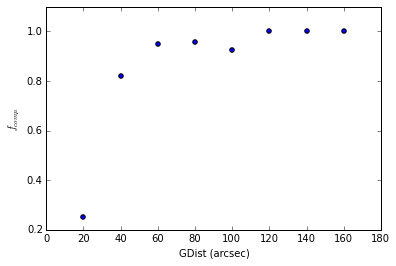

In [11]:
plt.figure()


plt.scatter(Bins_Dist, completeness_frac_Dist)
plt.xlabel('GDist (arcsec)')
plt.ylabel('$f_{comp.}$')
plt.savefig(filename[:-5]+'_GDist_completeness.png')
plt.show()

In [38]:
max(Bins_Dist)-Bins_Dist[1]+Bins_Dist[2]

160

In [39]:
Bins_Dist

array([ 20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150])

In [40]:
print max(SHST)
print max(SHST_G)
print min(SHST_G-SHST),'-', max(SHST_G-SHST)

24.96
26.281
0.502001 - 1.885


In [144]:
#import numpy as np
#import matplolib.pyplot as plt

N474D1=[21.2537, 21.2139,20.4228,20.2352,22.0225,22.0273,21.7629,20.8064,21.3921,21.0511,21.9703,21.4231,22.2613,22.3357,22.335, 20.4977,21.9516,22.243, 21.9944,22.2942,21.7134,20.3811,21.863, 22.1112,22.8244,22.9742,23.0515,23.7737,17.9936,23.5128,23.7429,20.0662,20.4376,20.7259,20.3914,20.4632,20.7822,21.2993,21.1645,21.8134,21.5717,21.2185,21.8298,23.2458,19.7647,23.2771,22.7167,23.8819,23.9741,23.9980,22.5058,20.4508,23.4125,23.63896,22.2883]

N474D2=[20.3776,21.6345,22.2883,20.4062,20.0711,20.1614,21.4901,21.4074,22.4207,21.1667,22.4706,18.7228,21.8605,22.613 ,22.8747,23.9383,24.1269,22.6267,23.8048,24.3091,19.72 ,20.0159,20.0339,20.8182,20.7006,20.8763,20.6807,20.9356,21.2588,21.2133,21.3587,21.3607,21.6889,21.1219,21.5728,21.1632,21.6436,21.7683,21.5459,21.9438,23.248144,22.539318,22.798574,22.45828 ,22.342617,21.628414,19.871]

N1052C1=[20.518 ,21.034 ,21.453,21.609 ,21.901 ,21.955,22.028,22.051 ,22.136 ,22.144,22.164 ,22.302 ,22.334 ,22.407 ,22.421,22.541,22.556,22.613,22.652 ,22.718 ,22.811 ,22.825,22.827 ,22.952 ,22.974 ,23.149 ,23.274 ,23.282 ,23.295 ,23.436 ,23.529 ,23.632 ,23.668,23.71 ,23.731,23.741 ,23.867,23.941 ,24.063,24.147,24.224 ,24.291 ,24.303 ,24.349,24.602 ,24.629 ]

N1052C2=[20.099,20.903,21.315,21.60,21.72,21.84,21.90,21.985,22.045,22.111,22.45 ,22.52,22.567,22.711,22.84,22.872,22.888,23.023,23.086,23.08,23.11,23.24,23.25,23.365,23.369,23.501,23.532,23.601,23.619,23.628,23.651,23.672,23.686,23.819,23.829,23.979,24.009,24.026,24.108,24.156,24.338,24.415,24.501,24.573,24.597,24.767,25.004]

N7280G1=[23.7795 ,21.8169 ,23.3982 ,23.1098 ,22.944 ,22.9305 ,22.6281 ,22.4791 ,22.3096 ,21.845 ,21.3028 ,20.9262 ,20.894 ,20.5865 ,20.5024 ,19.7952 ,23.7053 ,23.4936 ,23.2225 ,23.2324 ,22.9292 ,22.6651 ,22.5228 ,23.079 ,22.905 ,22.5744 ,22.8737 ,22.4347 ,22.4599 ,22.2014 ,22.388 ,21.8529 ,21.734 ,21.967 ,22.0335 ,21.9951 ,21.8255 ,21.6647 ,21.5592 ,21.7949 ,21.4029 ,21.1744 ,21.0841 ,21.1563 ,20.671 ,21.6499 ,23.3147 ,22.9702 ,21.2596 ,21.4211 ,23.7901 ,23.2797 ,23.2367 ,22.3472 ,19.9451 ,20.4792 ,22.1005]

N7280G2=[23.3921,23.2061,23.4112,21.3046,20.1534,23.2182,22.78 ,22.3033,22.2365,22.2211,21.8657,21.7478,21.6353,21.5697,21.4388,20.3155,20.2638,19.8273,23.8008,23.6841,23.7783,23.2464,23.0169,23.1337,22.662 ,22.9953,22.5469,22.3048,22.6829,22.4625,22.5288,22.2667,22.6647,22.5985,22.7033,22.6594,22.2603,22.543 ,22.0409,22.5214,22.4663,22.4356,21.9802,22.0938,22.3031,22.322 ,22.5576,21.574 ,22.1726,21.2932,21.0671,20.8094,20.851 ,20.5013,20.3235,20.0528]

N7454H1=[19.523 ,19.974 ,20.1355,20.3696,20.6423,21.3602,21.3885,21.9222,22.2097,22.5138,22.5244,22.6191,22.826 ,20.366 ,20.5014,21.1142,21.616 ,21.6482,21.8668,21.9914,22.1488,22.1597,22.2163,22.3402,22.5197,22.6886,22.8295,22.8531,22.9054,23.04 ,23.092 ,23.1219,23.1557,23.3337,23.4226,23.6954,23.7554,23.8014,23.9772,23.9807,21.3047,22.0828,22.1764,22.2217,22.398 ,22.4399,22.4486,22.6251,22.6666,22.7126,22.8313,22.9387,23.0491,21.3375,21.8893,23.5093,22.3992,22.9688]

N7454I2=np.array([19.6816, 19.7469, 19.9615, 20.4665,  21.1 , 21.1988, 21.2807, 21.5041, 21.5733, 22.0486, 23.179 , 21.3464, 21.4341, 21.7873, 22.0446, 22.1808, 22.3332, 22.4126, 22.5618, 22.6268, 22.6547, 22.845 , 23.1177, 23.1384, 23.3832, 23.4114, 23.4659, 23.5152, 23.8327, 24.1118, 20.9088, 20.9731, 21.3073, 21.8363, 21.9385, 21.9749, 22.1672, 22.2029, 22.2188, 22.386 , 22.4015, 22.7244, 23.0088, 23.0244, 23.1209, 20.9124, 21.8893, 23.2226, 22.5146, 21.763])


maskname=[N7454H1,N7454I2,N7280G1,N7280G2,N1052C1,N1052C2,N474D1,N474D2]

for i in np.arange(0,len(maskname),1):
    masknames=['1N7454H','2N7454I','1N7280G','2N7280G','1N1052C','2N1052C','1N474D','2N474D']
    no_clusters=len(maskname[i])
    brightness=np.median(maskname[i])
    print masknames[i],'no of clusters',no_clusters,brightness



1N7454H no of clusters 58 22.44425
2N7454I no of clusters 50 22.19185
1N7280G no of clusters 57 22.2014
2N7280G no of clusters 56 22.30405
1N1052C no of clusters 46 22.8895
2N1052C no of clusters 47 23.365
1N474D no of clusters 55 21.863
2N474D no of clusters 47 21.5459


In [41]:
print len(Bins_Dist),len(completeness_frac_Dist)

14 14
